### 1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2. Preprocessing 

In [2]:
df_orignal = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df = df_orignal.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Note:
- there aren't any missing value but we can't know for sure because the TotalCharges should be a float but it is a string so we must convert it to float first

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype(float)

df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
df.isna().sum()/df.shape[0]

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

Note:
- `NaN` is too small so `drop nan` is better solution and not effect on result

In [7]:
df = df.dropna()

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

### 3. Exploratory Data Analysis (EDA):

- **How many customers left the company last month? And what is their percentage?**

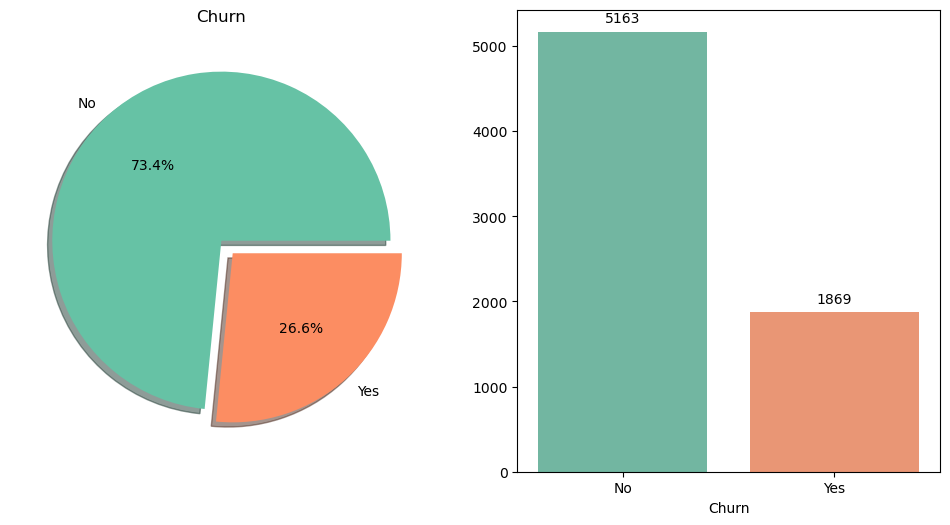

In [10]:
colors = sns.color_palette("Set2")
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df['Churn'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True,  colors=colors)
ax[0].set_title('Churn')
ax[0].set_ylabel('')


sns.countplot(data=df, x="Churn",ax=ax[1],  palette=colors)
ax[1].set_ylabel('')

for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.show()

- **How many clients of each gender does the company have? And what is their percentage?**

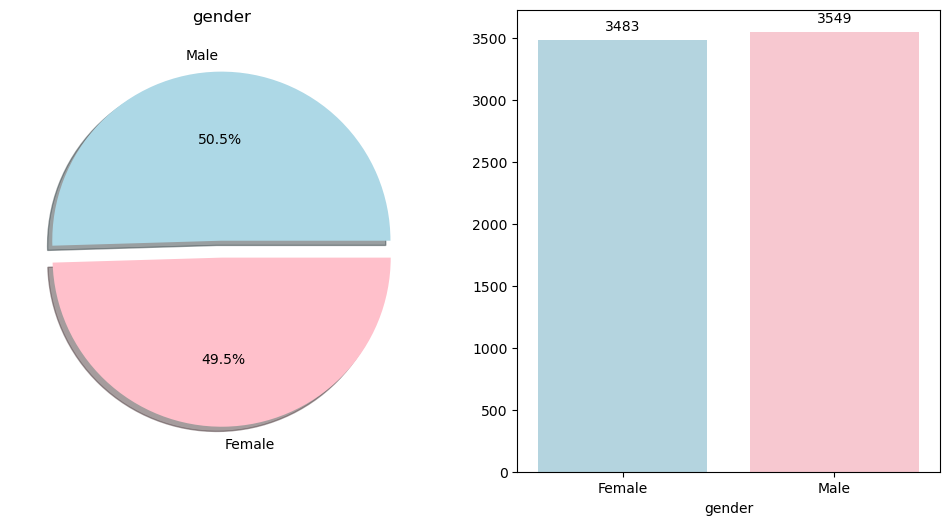

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
colors = ['#ADD8E6', '#FFC0CB']

df['gender'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True,colors=colors)
ax[0].set_title('gender')
ax[0].set_ylabel('')

sns.countplot(data=df, x="gender",ax=ax[1],palette=colors)
ax[1].set_ylabel('')

for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.show()

- **Customers who left the company for each gender**

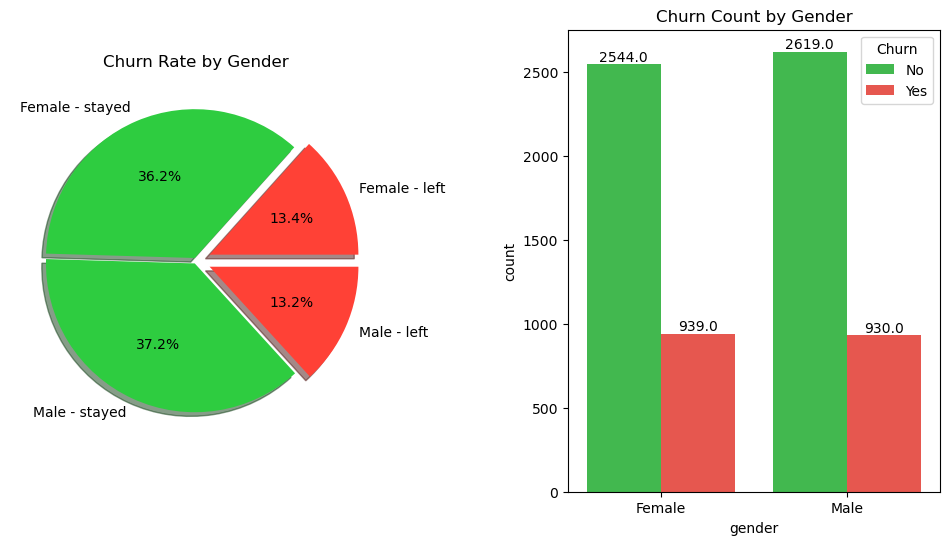

In [12]:
GenderChurngrouped = df.groupby('gender')['Churn'].value_counts()


palette = {'No': '#2ECC40', 'Yes': '#FF4136'}
labels = ['Female - left', 'Female - stayed', 'Male - stayed', 'Male - left']
values = [GenderChurngrouped['Female']['Yes'], GenderChurngrouped['Female']['No'], GenderChurngrouped['Male']['No'], GenderChurngrouped['Male']['Yes']]


fig, axs = plt.subplots(1, 2, figsize=(12, 6))


axs[0].pie(values, labels=labels, autopct='%1.1f%%', shadow=True,explode=[0.1, 0.02, 0.02, 0.1], colors=[palette['Yes'], palette['No'], palette['No'], palette['Yes']])
axs[0].set_title('Churn Rate by Gender')


sns.countplot(data=df, x="gender", hue="Churn", ax=axs[1],palette=palette)
axs[1].set_title('Churn Count by Gender')

# Add annotations to the countplot
for p in axs[1].patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + count +20
    axs[1].annotate(count, (x, y), ha='center')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

- **How many customers are considered elderly? And what is their percentage?**

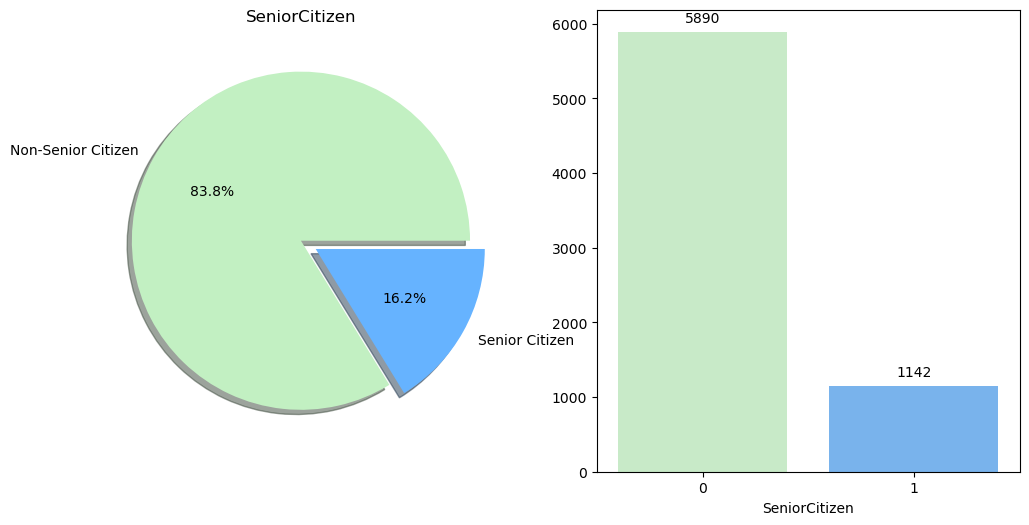

In [13]:
colors = [ '#c2f0c2', '#66b3ff']
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df['SeniorCitizen'].value_counts().plot.pie(explode=[0, 0.1],  labels=['Non-Senior Citizen', 'Senior Citizen'],autopct='%1.1f%%', ax=ax[0], shadow=True,  colors=colors)
ax[0].set_title('SeniorCitizen')
ax[0].set_ylabel('')


sns.countplot(data=df, x="SeniorCitizen",ax=ax[1],  palette=colors)
ax[1].set_ylabel('')

for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.show()

Notes:
- `16.2%` of the company's clients are elderly and the rest are young.

- **senior citizens who left the company versus those who did not?**

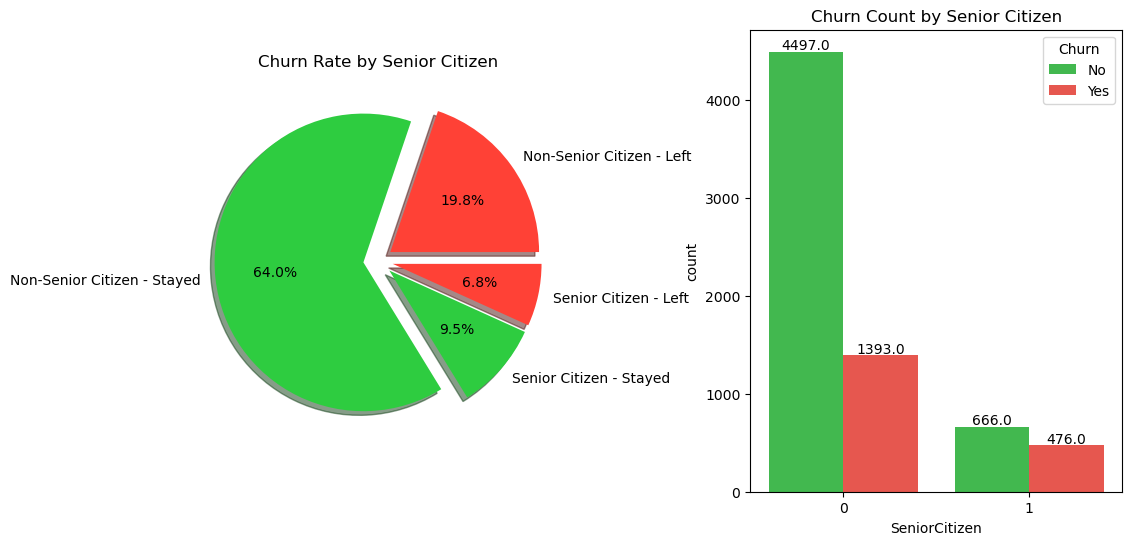

In [14]:
SeniorChurnGrouped = df.groupby('SeniorCitizen')['Churn'].value_counts()

palette = {'No': '#2ECC40', 'Yes': '#FF4136'}
labels = ['Non-Senior Citizen - Left', 'Non-Senior Citizen - Stayed', 'Senior Citizen - Stayed', 'Senior Citizen - Left']

values = [SeniorChurnGrouped[0]['Yes'], SeniorChurnGrouped[0]['No'],
          SeniorChurnGrouped[1]['No'], SeniorChurnGrouped[1]['Yes']]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(values, labels=labels, autopct='%1.1f%%',
           shadow=True, explode=[0.1, 0.1, 0.1, 0.1],
           colors=[palette['Yes'], palette['No'], palette['No'], palette['Yes']])

axs[0].set_title('Churn Rate by Senior Citizen')

sns.countplot(data=df, x="SeniorCitizen", hue="Churn", ax=axs[1], palette=palette)
axs[1].set_title('Churn Count by Senior Citizen')

# Add annotations to the countplot
for p in axs[1].patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + count + 20
    axs[1].annotate(count, (x, y), ha='center')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

In [15]:
df_SeniorCitizen = df[df['SeniorCitizen']== 1]
SeniorChurnGrouped = df_SeniorCitizen.groupby('SeniorCitizen')['Churn'].value_counts()
SeniorChurnGrouped

SeniorCitizen  Churn
1              No       666
               Yes      476
Name: Churn, dtype: int64

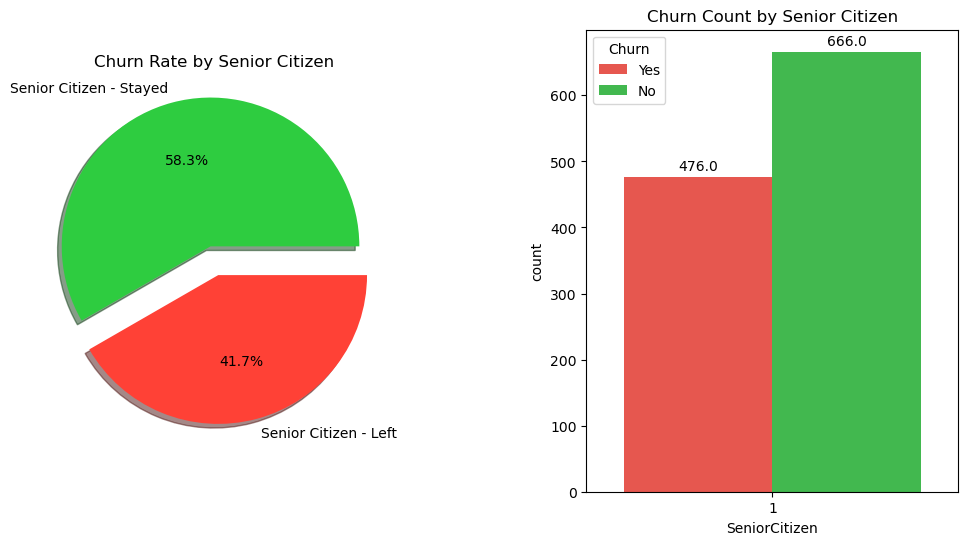

In [16]:
palette = {'No': '#2ECC40', 'Yes': '#FF4136'}
labels = ['Senior Citizen - Stayed', 'Senior Citizen - Left']

values = [SeniorChurnGrouped[1]['No'], SeniorChurnGrouped[1]['Yes']]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(values, labels=labels, autopct='%1.1f%%',
           shadow=True, explode=[0.1, 0.1],
           colors=[palette['No'], palette['Yes']])

axs[0].set_title('Churn Rate by Senior Citizen')

sns.countplot(data=df_SeniorCitizen, x="SeniorCitizen", hue="Churn", ax=axs[1], palette=palette)
axs[1].set_title('Churn Count by Senior Citizen')

# Add annotations to the countplot
for p in axs[1].patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + count + 10
    axs[1].annotate(count, (x, y), ha='center')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

Note:
- `41.7%` of senior citizens left the company.

- **How many clients does a partner have? And what is their percentage?**

In [17]:
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

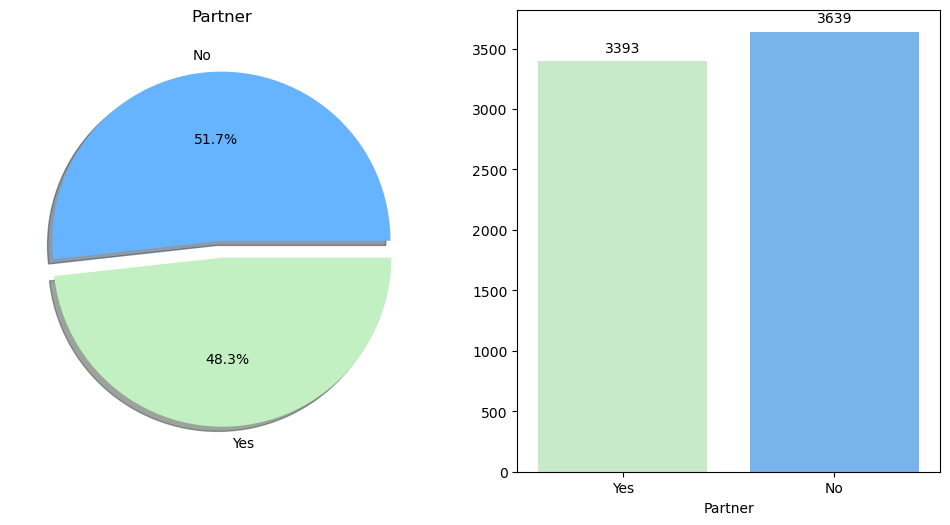

In [18]:
colors = [ '#c2f0c2', '#66b3ff']
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df['Partner'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True,  colors=colors[::-1])
ax[0].set_title('Partner')
ax[0].set_ylabel('')


sns.countplot(data=df, x="Partner",ax=ax[1],  palette=colors)
ax[1].set_ylabel('')

for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.show()

Note: 
- `51.7%` of clients don't have a partner.

- client have or dont have partner who left the company vs those who did not?

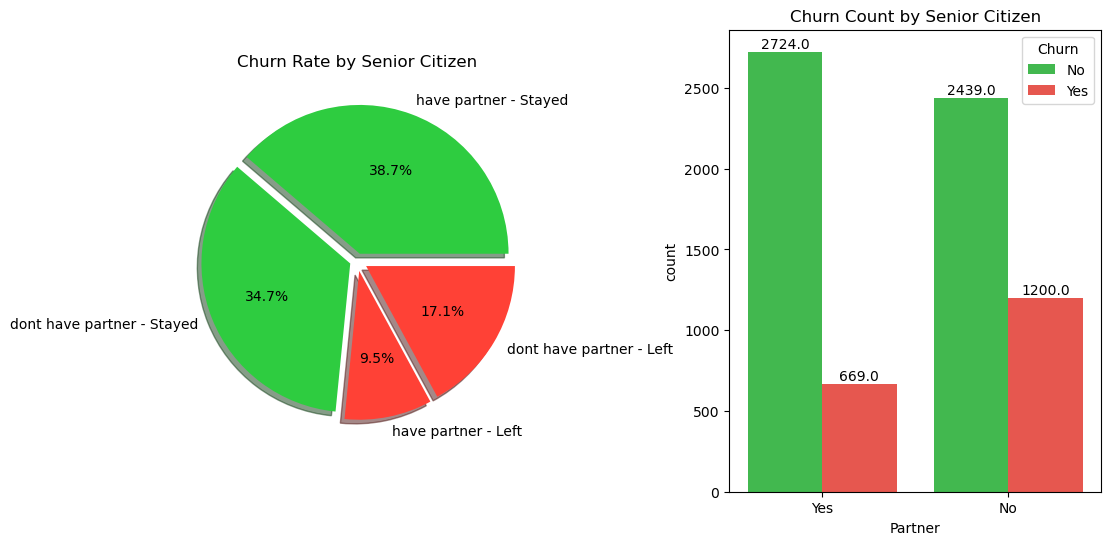

In [19]:
PartnerChurnGrouped = df.groupby('Partner')['Churn'].value_counts()

palette = {'No': '#2ECC40', 'Yes': '#FF4136'}
labels = [ 'have partner - Stayed', 'dont have partner - Stayed', 'have partner - Left', 'dont have partner - Left']

values = [PartnerChurnGrouped['Yes']['No'],PartnerChurnGrouped['No']['No'],
          PartnerChurnGrouped['Yes']['Yes'], PartnerChurnGrouped['No']['Yes']]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(values, labels=labels, autopct='%1.1f%%',
           shadow=True, explode=[0.05, 0.05, 0.07, 0.07],
           colors=[palette['No'], palette['No'], palette['Yes'], palette['Yes']])

axs[0].set_title('Churn Rate by Senior Citizen')

sns.countplot(data=df, x="Partner", hue="Churn", ax=axs[1], palette=palette)
axs[1].set_title('Churn Count by Senior Citizen')

# Add annotations to the countplot
for p in axs[1].patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + count + 20
    axs[1].annotate(count, (x, y), ha='center')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

- What is the count of of dependent clients?

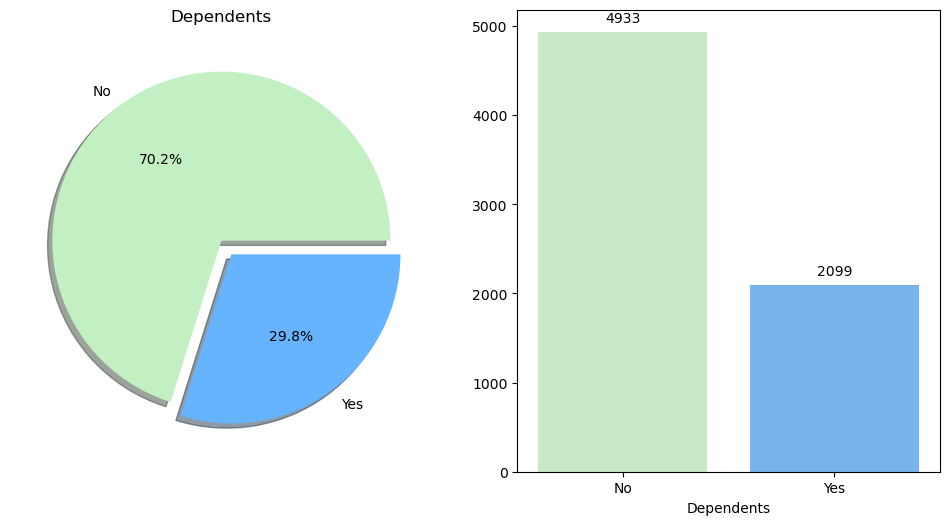

In [20]:
colors = [ '#c2f0c2', '#66b3ff']
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df['Dependents'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True,  colors=colors)
ax[0].set_title('Dependents')
ax[0].set_ylabel('')


sns.countplot(data=df, x="Dependents",ax=ax[1],  palette=colors)
ax[1].set_ylabel('')

for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.show()

In [21]:
grouped = df.groupby(['Dependents', 'Churn']).size().reset_index(name='Count')

grouped['Percentage'] =np.round(grouped['Count'] / grouped.groupby('Dependents')['Count'].transform('sum') * 100,2)
grouped

,Dependents,Churn,Count,Percentage
0,No,No,3390,68.72
1,No,Yes,1543,31.28
2,Yes,No,1773,84.47
3,Yes,Yes,326,15.53


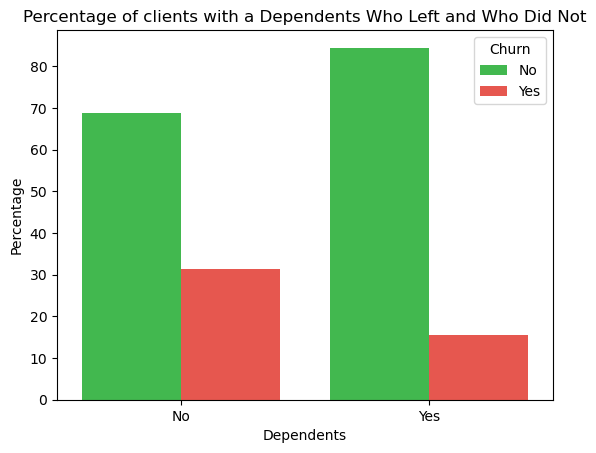

In [22]:
palette = {'No': '#2ECC40', 'Yes': '#FF4136'}
sns.barplot(x='Dependents', y='Percentage', hue='Churn', data=grouped, palette=palette)
plt.title('Percentage of clients with a Dependents Who Left and Who Did Not')
plt.ylabel('Percentage')
plt.xlabel('Dependents')
plt.show()

Note:
- `31%` of independent clients left the company.

- **How many customers does the phone service have? And what is their percentage?**

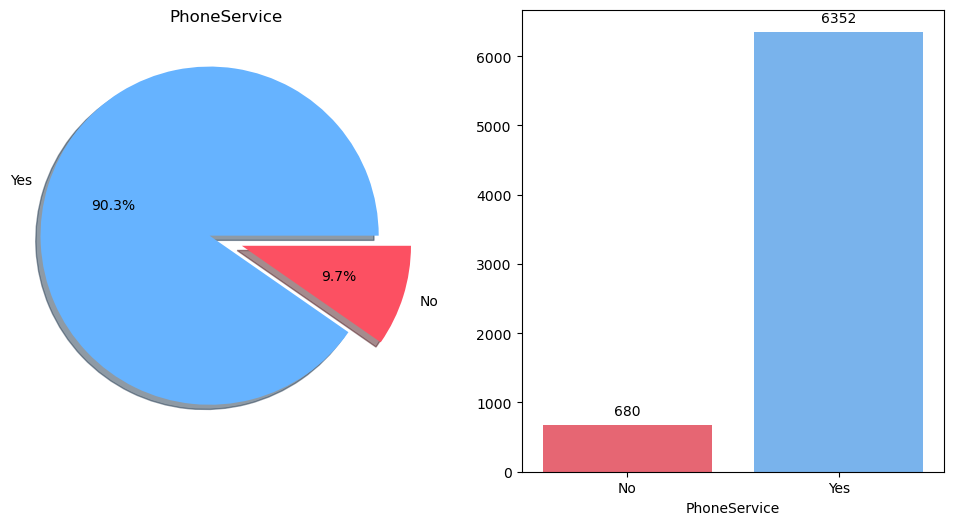

In [23]:
colors = [ '#fc5062', '#66b3ff']
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df['PhoneService'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True,  colors=colors[::-1])
ax[0].set_title('PhoneService')
ax[0].set_ylabel('')


sns.countplot(data=df, x="PhoneService",ax=ax[1],  palette=colors)
ax[1].set_ylabel('')

for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.show()

Note:
- `90.3%` who have phone service

In [24]:
grouped = df.groupby(['PhoneService', 'Churn']).size().reset_index(name='Count')

grouped['Percentage'] =np.round(grouped['Count'] / grouped.groupby('PhoneService')['Count'].transform('sum') * 100,2)
grouped

,PhoneService,Churn,Count,Percentage
0,No,No,510,75.00
1,No,Yes,170,25.00
2,Yes,No,4653,73.25
3,Yes,Yes,1699,26.75


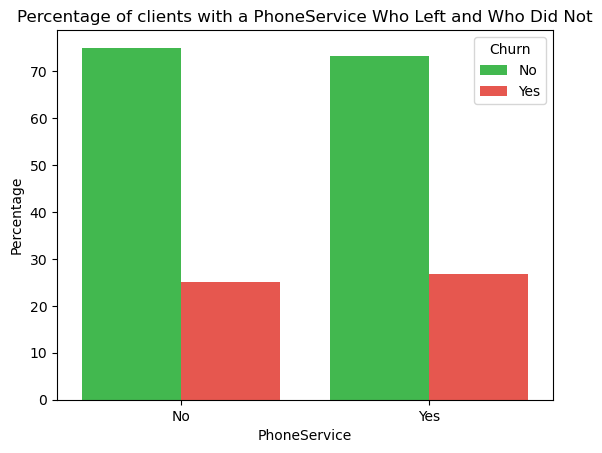

In [25]:
palette = {'No': '#2ECC40', 'Yes': '#FF4136'}
sns.barplot(x='PhoneService', y='Percentage', hue='Churn', data=grouped, palette=palette)
plt.title('Percentage of clients with a PhoneService Who Left and Who Did Not')
plt.ylabel('Percentage')
plt.xlabel('PhoneService')
plt.show()

Note:
- Phone Service almost didn't affect on Churn

- What is the relationship between between tenure and Month charges?


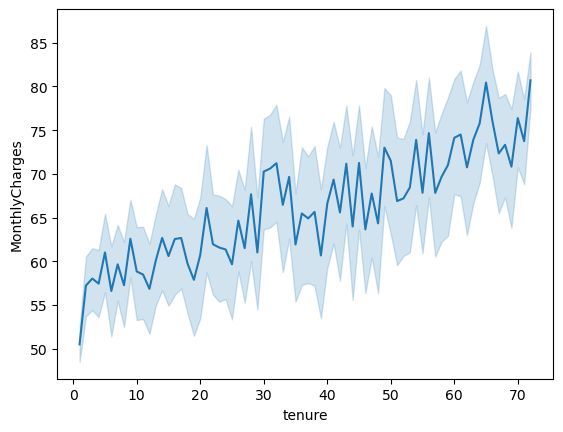

In [26]:
sns.lineplot(data=df,x="tenure",y="MonthlyCharges");

In [27]:
df[['MonthlyCharges','TotalCharges']].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651065
TotalCharges,0.651065,1.000000


Note:
- There is a `65.1%` correlation between them which make sense as the TotalCharges dependant on the monthly charges

In [28]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

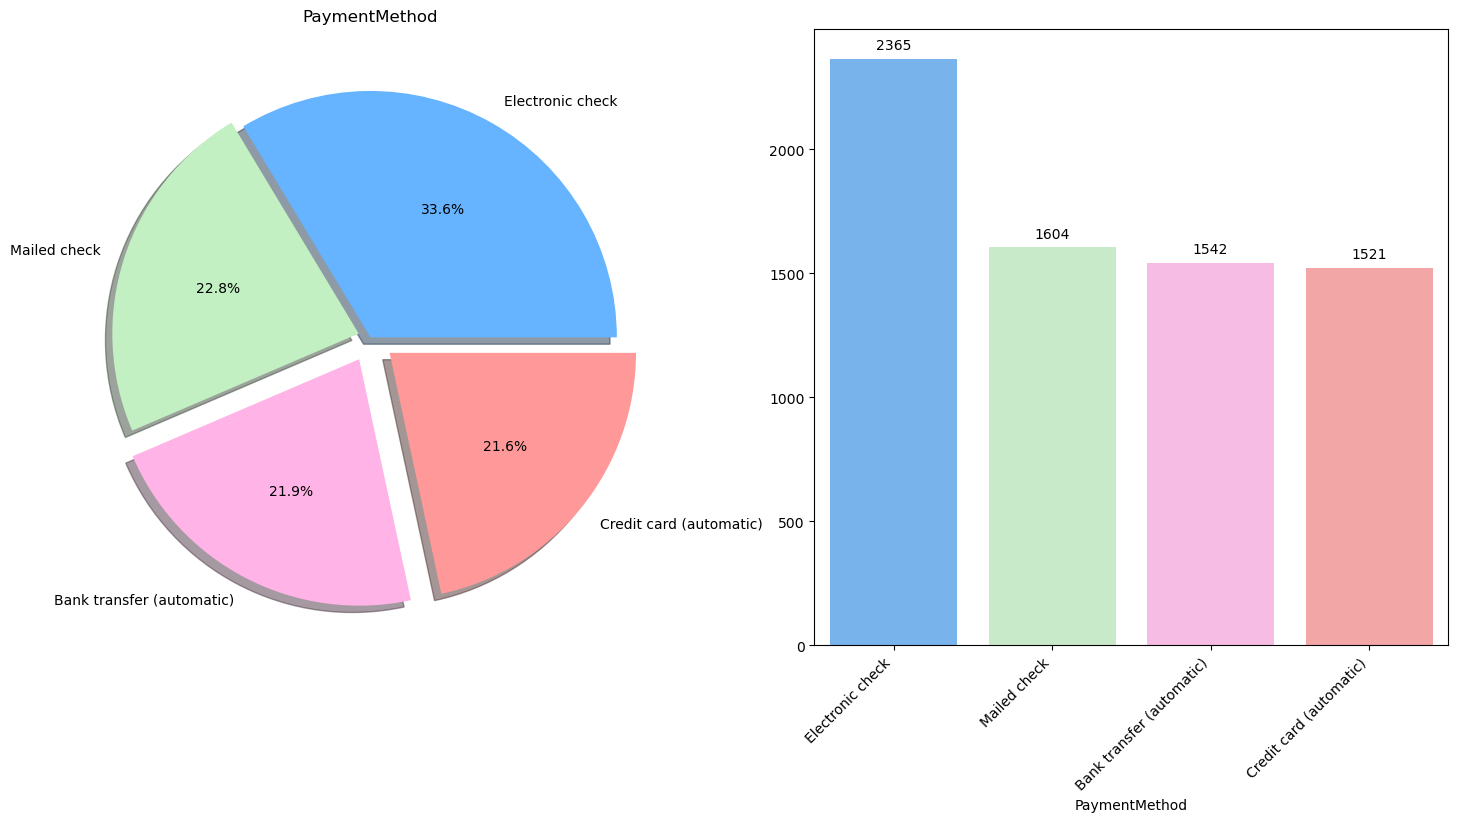

In [29]:
colors = ['#66b3ff', '#c2f0c2', '#ffb3e6', '#ff9999']
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

df['PaymentMethod'].value_counts().plot.pie(explode=[0, 0.05, 0.1,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True,  colors=colors)
ax[0].set_title('PaymentMethod')
ax[0].set_ylabel('')


sns.countplot(data=df, x="PaymentMethod",ax=ax[1],  palette=colors)
ax[1].set_ylabel('')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.show()

In [30]:
df.groupby('PaymentMethod')['Churn'].value_counts()

PaymentMethod              Churn
Bank transfer (automatic)  No       1284
                           Yes       258
Credit card (automatic)    No       1289
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1296
                           Yes       308
Name: Churn, dtype: int64

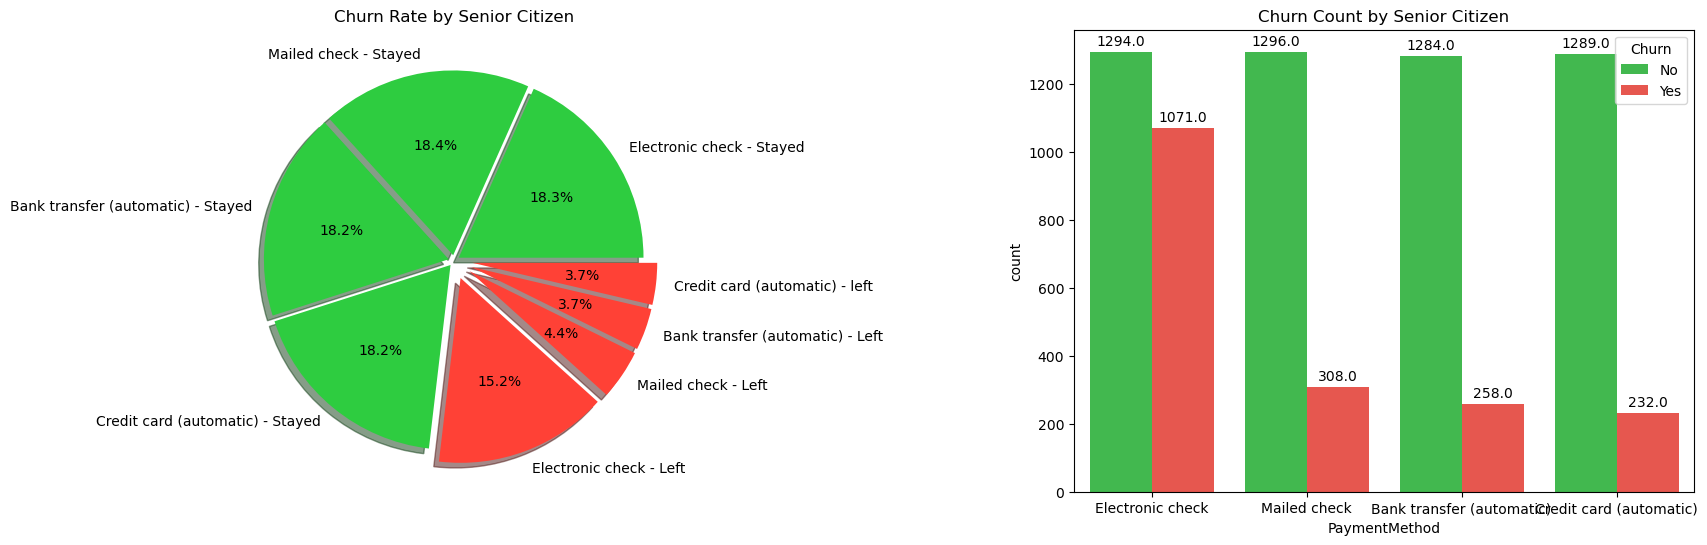

In [31]:
ChargesChurnGrouped = df.groupby('PaymentMethod')['Churn'].value_counts()

palette = {'No': '#2ECC40', 'Yes': '#FF4136'}
labels = [ 'Electronic check - Stayed', 'Mailed check - Stayed',
          'Bank transfer (automatic) - Stayed', 'Credit card (automatic) - Stayed',
          'Electronic check - Left', 'Mailed check - Left',
          'Bank transfer (automatic) - Left', 'Credit card (automatic) - left',]

values = [ChargesChurnGrouped['Electronic check']['No'], ChargesChurnGrouped['Mailed check']['No'],
          ChargesChurnGrouped['Bank transfer (automatic)']['No'], ChargesChurnGrouped['Bank transfer (automatic)']['No'],
          ChargesChurnGrouped['Electronic check']['Yes'],ChargesChurnGrouped['Mailed check']['Yes'],
          ChargesChurnGrouped['Bank transfer (automatic)']['Yes'], ChargesChurnGrouped['Bank transfer (automatic)']['Yes'],]

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].pie(values, labels=labels, autopct='%1.1f%%',
           shadow=True, explode=[0.03, 0.03, 0.03, 0.03, 0.1, 0.1, 0.1, 0.1],
           colors=[palette['No'], palette['No'], palette['No'], palette['No'], palette['Yes'], palette['Yes'], palette['Yes'], palette['Yes']])

axs[0].set_title('Churn Rate by Senior Citizen')

sns.countplot(data=df, x="PaymentMethod", hue="Churn", ax=axs[1], palette=palette)
axs[1].set_title('Churn Count by Senior Citizen')

# Add annotations to the countplot
for p in axs[1].patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + count + 20
    axs[1].annotate(count, (x, y), ha='center')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

In [32]:
grouped = df.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='Count')

grouped['Percentage'] =np.round(grouped['Count'] / grouped.groupby('PaymentMethod')['Count'].transform('sum') * 100,2)
grouped

,PaymentMethod,Churn,Count,Percentage
0,Bank transfer (automatic),No,1284,83.27
1,Bank transfer (automatic),Yes,258,16.73
2,Credit card (automatic),No,1289,84.75
3,Credit card (automatic),Yes,232,15.25
4,Electronic check,No,1294,54.71
5,Electronic check,Yes,1071,45.29
6,Mailed check,No,1296,80.80
7,Mailed check,Yes,308,19.20


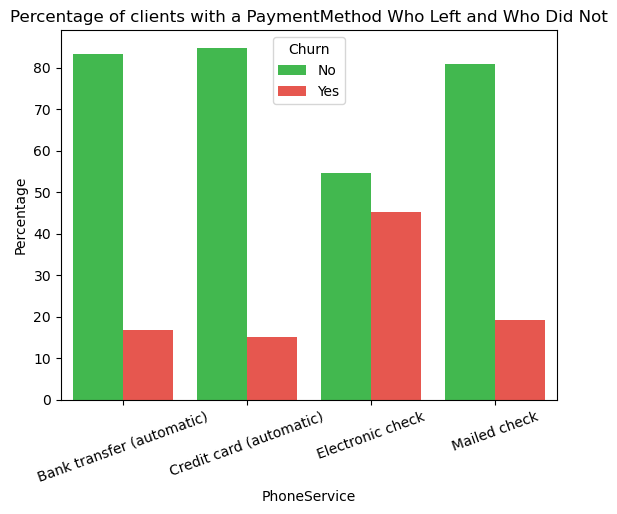

In [33]:
palette = {'No': '#2ECC40', 'Yes': '#FF4136'}
sns.barplot(x='PaymentMethod', y='Percentage', hue='Churn', data=grouped, palette=palette)
plt.title('Percentage of clients with a PaymentMethod Who Left and Who Did Not')
plt.ylabel('Percentage')
plt.xlabel('PhoneService')
plt.xticks(rotation=20)
plt.show()

The electronic check has the most left client

-what distribution of Total Charges?

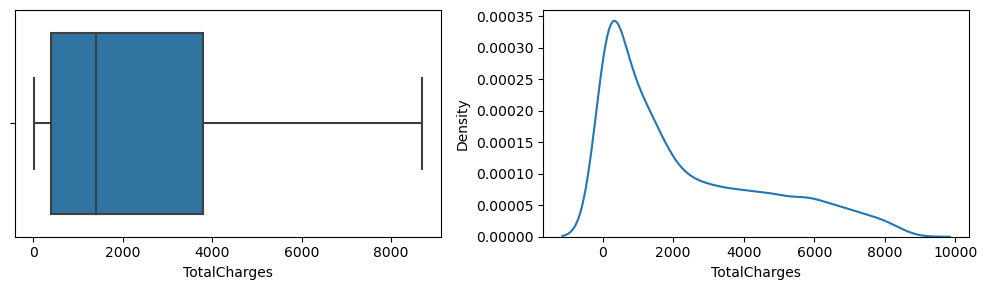

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(x=df['TotalCharges'], ax=ax[0])
sns.kdeplot(x=df['TotalCharges'], ax=ax[1])

plt.tight_layout()
plt.show()

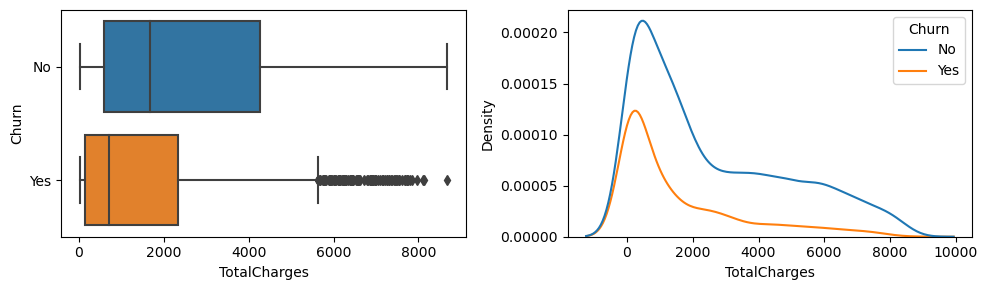

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(data = df, x='TotalCharges', y ='Churn', ax=ax[0])
sns.kdeplot(data= df, x='TotalCharges', hue ='Churn' , ax=ax[1])

plt.tight_layout()
plt.show()

Note:
- Too small clients left and have Total charges < 5000

split Total Charge To More understand 
- low (10.134, 2907.467]
- Medium (2907.467, 5796.133]
- High Total charges (5796.133, 8684.8]

In [36]:
pd.cut(df.TotalCharges, bins=3).value_counts()

(10.134, 2907.467]      4778
(2907.467, 5796.133]    1471
(5796.133, 8684.8]       783
Name: TotalCharges, dtype: int64

In [37]:
df['TotalCharges_Cut'] = pd.cut(df.TotalCharges, bins=3, labels=['Low', 'Medium', 'High'])

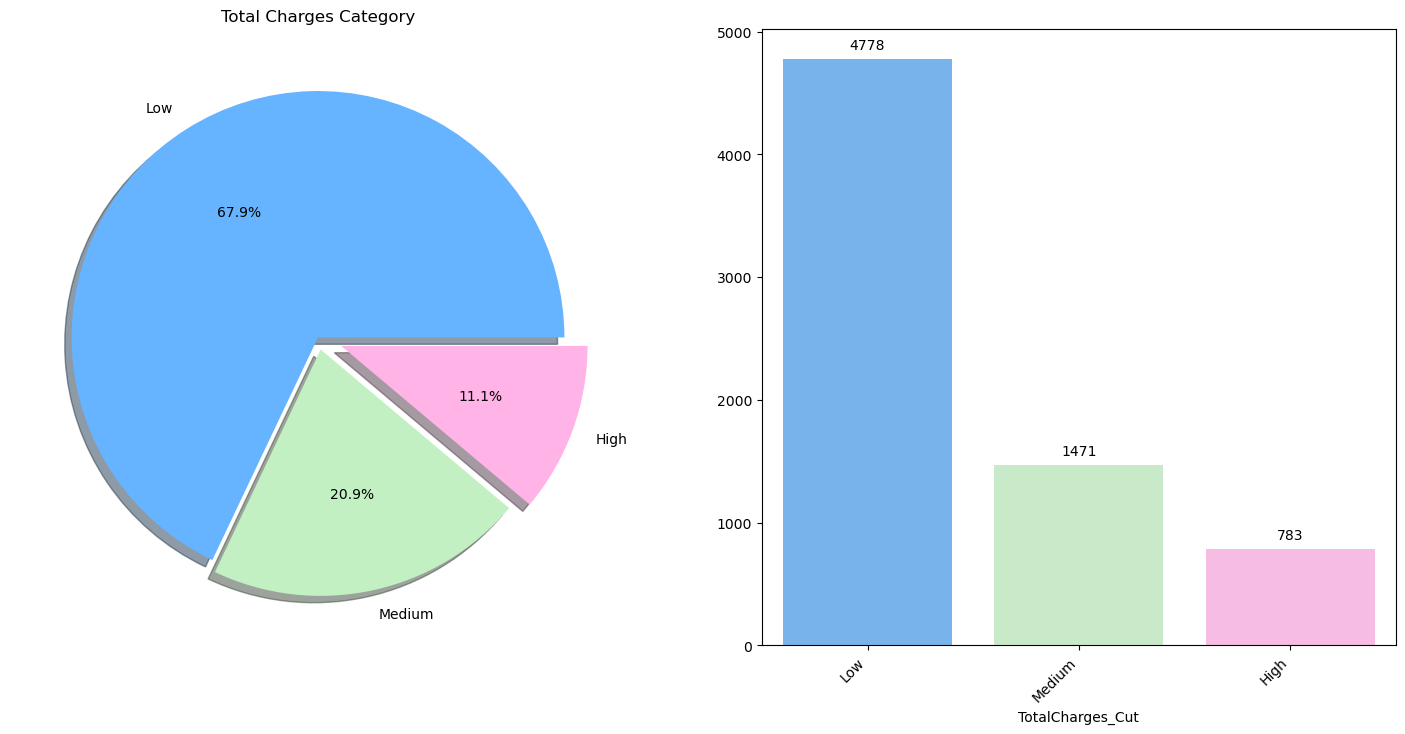

In [38]:
colors = ['#66b3ff', '#c2f0c2', '#ffb3e6', '#ff9999']
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

df['TotalCharges_Cut'].value_counts().plot.pie(explode=[0, 0.05,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True,  colors=colors)
ax[0].set_title('Total Charges Category')
ax[0].set_ylabel('')


sns.countplot(data=df, x="TotalCharges_Cut",ax=ax[1],  palette=colors)
ax[1].set_ylabel('')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.show()

In [39]:
PartnerChurnGrouped = df.groupby('TotalCharges_Cut')['Churn'].value_counts()
PartnerChurnGrouped

TotalCharges_Cut  Churn
Low               No       3271
                  Yes      1507
Medium            No       1205
                  Yes       266
High              No        687
                  Yes        96
Name: Churn, dtype: int64

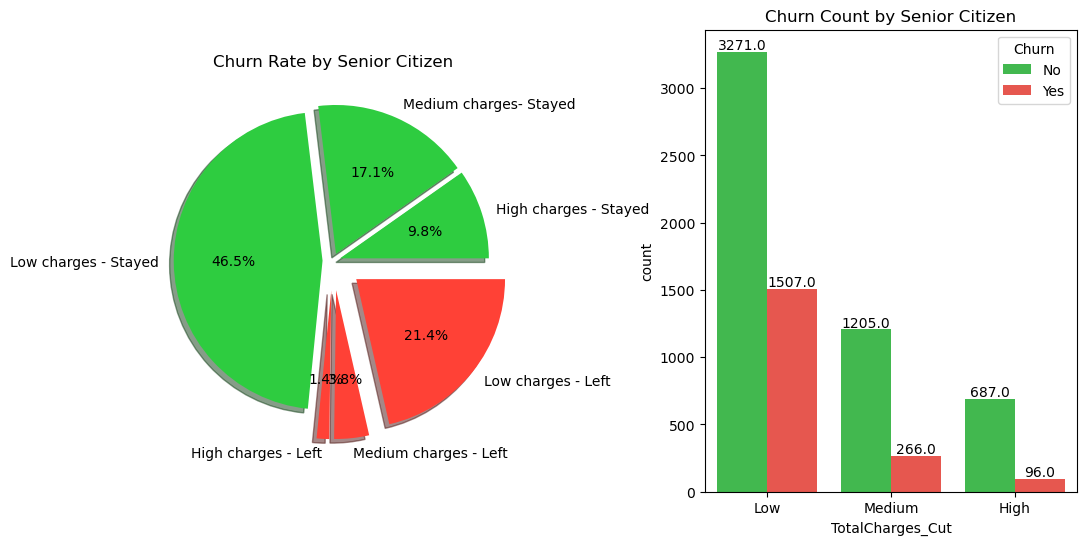

In [40]:
ChargesChurnGrouped = df.groupby('TotalCharges_Cut')['Churn'].value_counts()

palette = {'No': '#2ECC40', 'Yes': '#FF4136'}
labels = [ 'High charges - Stayed', 'Medium charges- Stayed', 'Low charges - Stayed', 
          'High charges - Left', 'Medium charges - Left', 'Low charges - Left',]

values = [ChargesChurnGrouped['High']['No'],ChargesChurnGrouped['Medium']['No'], ChargesChurnGrouped['Low']['No'],
          ChargesChurnGrouped['High']['Yes'],ChargesChurnGrouped['Medium']['Yes'], ChargesChurnGrouped['Low']['Yes'],]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(values, labels=labels, autopct='%1.1f%%',
           shadow=True, explode=[0.05, 0.05, 0.07, 0.2, 0.2, 0.2],
           colors=[palette['No'], palette['No'], palette['No'], palette['Yes'], palette['Yes'], palette['Yes']])

axs[0].set_title('Churn Rate by Senior Citizen')

sns.countplot(data=df, x="TotalCharges_Cut", hue="Churn", ax=axs[1], palette=palette)
axs[1].set_title('Churn Count by Senior Citizen')

# Add annotations to the countplot
for p in axs[1].patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + count + 20
    axs[1].annotate(count, (x, y), ha='center')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

In [41]:
grouped = df.groupby(['TotalCharges_Cut', 'Churn']).size().reset_index(name='Count')

grouped['Percentage'] =np.round(grouped['Count'] / grouped.groupby('TotalCharges_Cut')['Count'].transform('sum') * 100,2)
grouped

,TotalCharges_Cut,Churn,Count,Percentage
0,Low,No,3271,68.46
1,Low,Yes,1507,31.54
2,Medium,No,1205,81.92
3,Medium,Yes,266,18.08
4,High,No,687,87.74
5,High,Yes,96,12.26


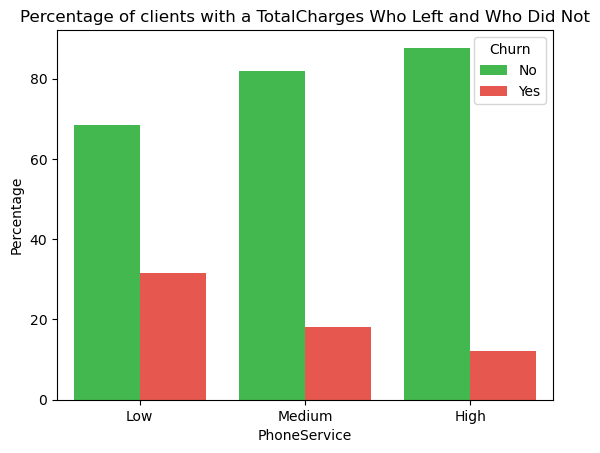

In [42]:
palette = {'No': '#2ECC40', 'Yes': '#FF4136'}
sns.barplot(x='TotalCharges_Cut', y='Percentage', hue='Churn', data=grouped, palette=palette)
plt.title('Percentage of clients with a TotalCharges Who Left and Who Did Not')
plt.ylabel('Percentage')
plt.xlabel('PhoneService')
plt.show()

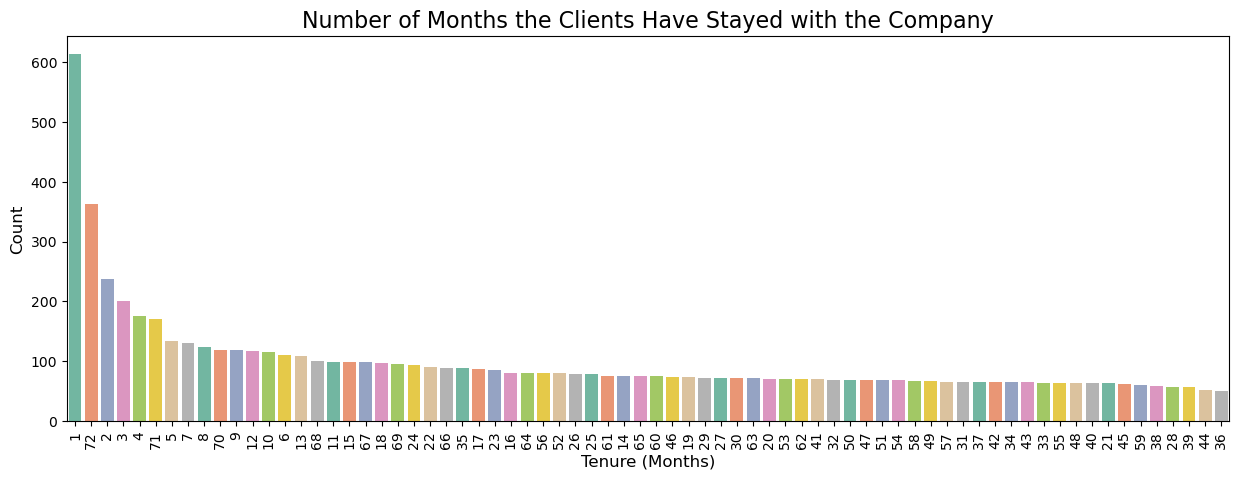

In [43]:
custom_palette = sns.color_palette("Set2")
tenure_order = df['tenure'].value_counts().index

plt.figure(figsize=(15, 5))
sns.countplot(x='tenure', data=df, order=tenure_order, palette=custom_palette)
plt.title('Number of Months the Clients Have Stayed with the Company', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90) # Rotating x-axis labels for better visibility
plt.show()

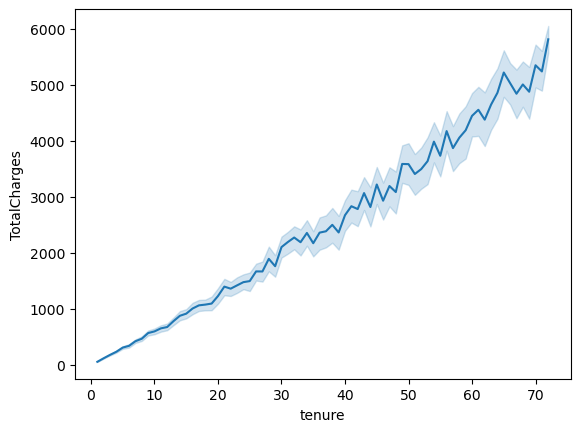

In [44]:
sns.lineplot(data=df,x="tenure",y="TotalCharges");

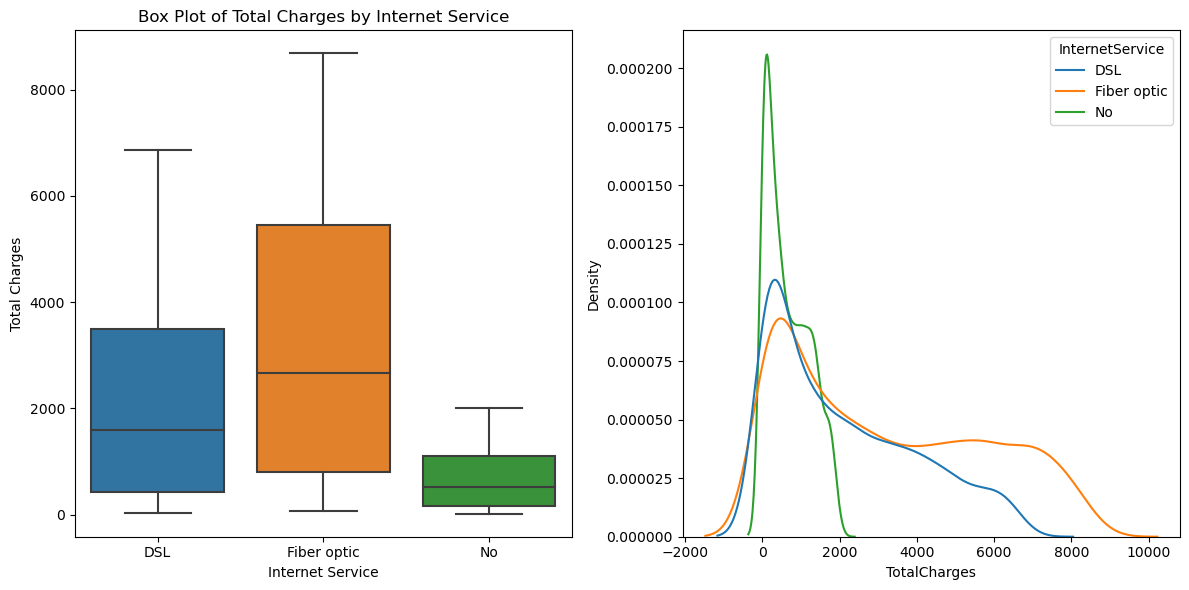

In [45]:

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = df, x='InternetService', y ='TotalCharges', ax=ax[0])

ax[0].set_title('Box Plot of Total Charges by Internet Service')
ax[0].set_xlabel('Internet Service')
ax[0].set_ylabel('Total Charges')

sns.kdeplot(data= df, x='TotalCharges', hue ='InternetService' , ax=ax[1])

plt.tight_layout()
plt.show()
plt.show()

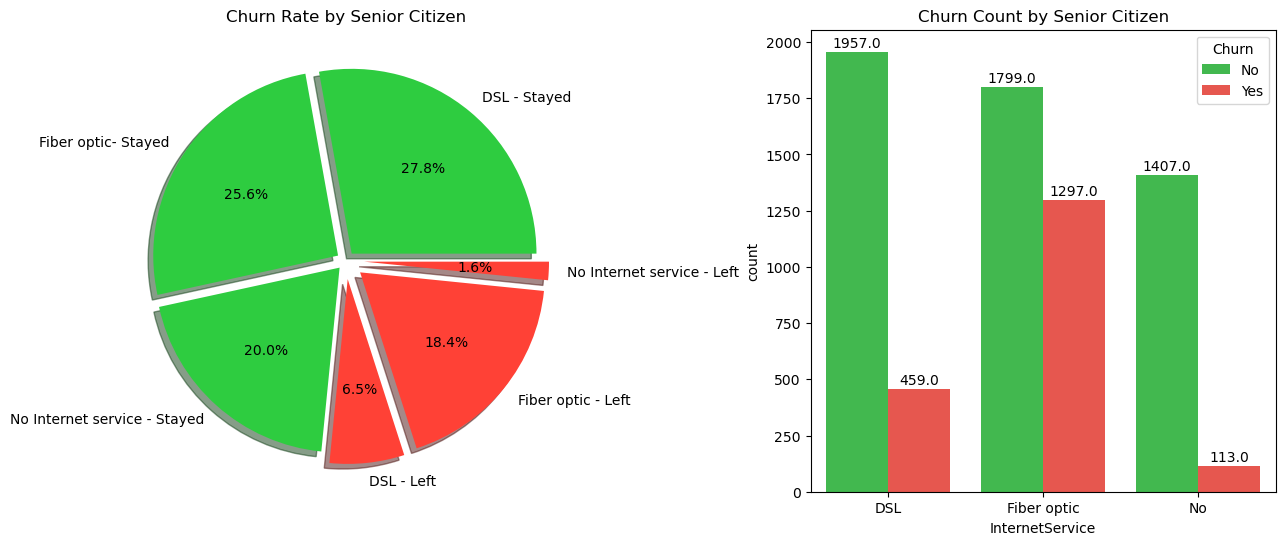

In [46]:
ChargesChurnGrouped = df.groupby('InternetService')['Churn'].value_counts()

palette = {'No': '#2ECC40', 'Yes': '#FF4136'}
labels = [ 'DSL - Stayed', 'Fiber optic- Stayed', 'No Internet service - Stayed', 
          'DSL - Left', 'Fiber optic - Left', 'No Internet service - Left',]

values = [ChargesChurnGrouped['DSL']['No'],ChargesChurnGrouped['Fiber optic']['No'], ChargesChurnGrouped['No']['No'],
          ChargesChurnGrouped['DSL']['Yes'],ChargesChurnGrouped['Fiber optic']['Yes'], ChargesChurnGrouped['No']['Yes'],]

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].pie(values, labels=labels, autopct='%1.1f%%',
           shadow=True, explode=[0.05, 0.05, 0.05, 0.1, 0.1, 0.1],
           colors=[palette['No'], palette['No'], palette['No'], palette['Yes'], palette['Yes'], palette['Yes']])

axs[0].set_title('Churn Rate by Senior Citizen')

sns.countplot(data=df, x="InternetService", hue="Churn", ax=axs[1], palette=palette)
axs[1].set_title('Churn Count by Senior Citizen')

# Add annotations to the countplot
for p in axs[1].patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + count + 20
    axs[1].annotate(count, (x, y), ha='center')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

In [47]:
grouped = df.groupby(['InternetService', 'Churn']).size().reset_index(name='Count')

grouped['Percentage'] =np.round(grouped['Count'] / grouped.groupby('InternetService')['Count'].transform('sum') * 100,2)
grouped

,InternetService,Churn,Count,Percentage
0,DSL,No,1957,81.00
1,DSL,Yes,459,19.00
2,Fiber optic,No,1799,58.11
3,Fiber optic,Yes,1297,41.89
4,No,No,1407,92.57
5,No,Yes,113,7.43


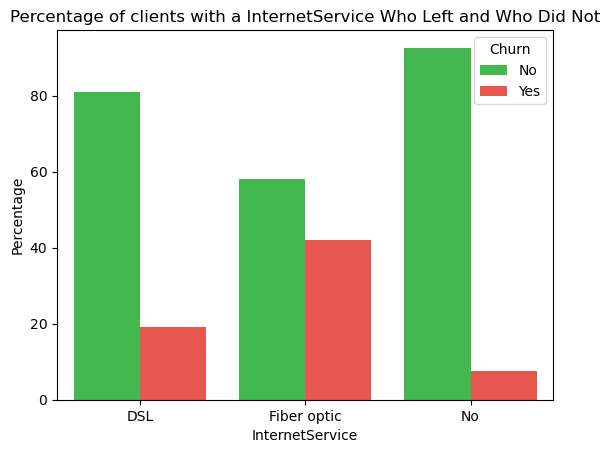

In [48]:
palette = {'No': '#2ECC40', 'Yes': '#FF4136'}
sns.barplot(x='InternetService', y='Percentage', hue='Churn', data=grouped, palette=palette)
plt.title('Percentage of clients with a InternetService Who Left and Who Did Not')
plt.ylabel('Percentage')
plt.xlabel('InternetService')
plt.show()

Note:
- `41%` of Clients that uses Fiber optics left the company

- **what if we used paperless billing?**

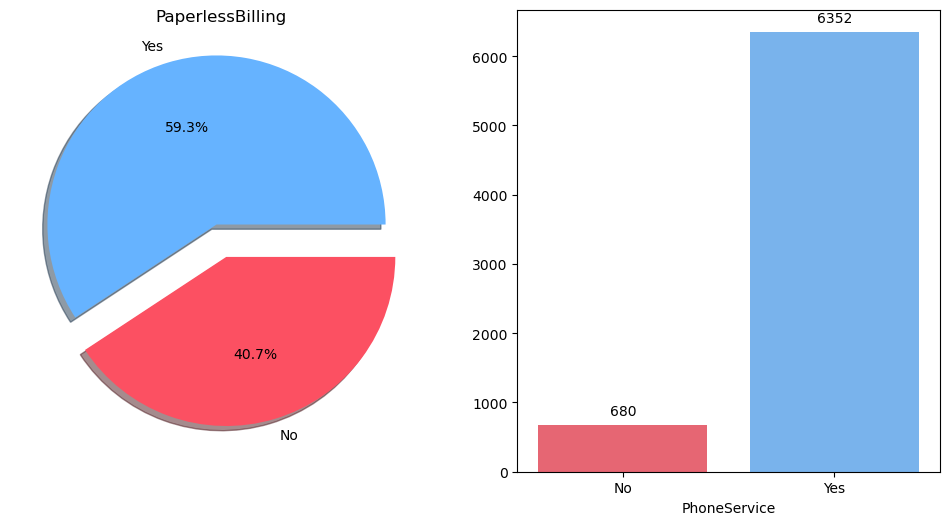

In [49]:
colors = [ '#fc5062', '#66b3ff']
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df['PaperlessBilling'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True,  colors=colors[::-1])
ax[0].set_title('PaperlessBilling')
ax[0].set_ylabel('')


sns.countplot(data=df, x="PhoneService",ax=ax[1],  palette=colors)
ax[1].set_ylabel('')

for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.show()

In [50]:
grouped = df.groupby(['PaperlessBilling', 'Churn']).size().reset_index(name='Count')

grouped['Percentage'] =np.round(grouped['Count'] / grouped.groupby('PaperlessBilling')['Count'].transform('sum') * 100,2)
grouped

,PaperlessBilling,Churn,Count,Percentage
0,No,No,2395,83.62
1,No,Yes,469,16.38
2,Yes,No,2768,66.41
3,Yes,Yes,1400,33.59


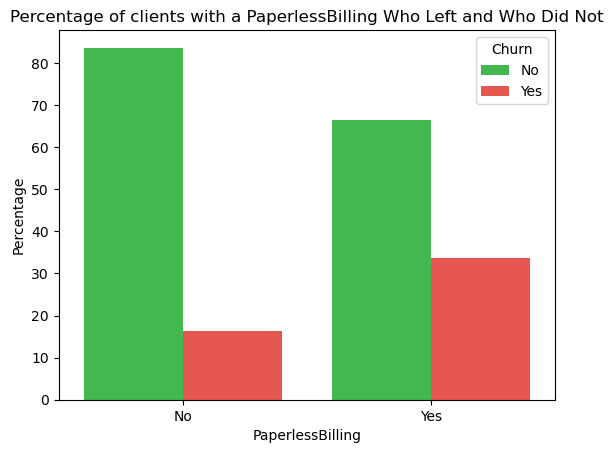

In [51]:
palette = {'No': '#2ECC40', 'Yes': '#FF4136'}
sns.barplot(x='PaperlessBilling', y='Percentage', hue='Churn', data=grouped, palette=palette)
plt.title('Percentage of clients with a PaperlessBilling Who Left and Who Did Not')
plt.ylabel('Percentage')
plt.xlabel('PaperlessBilling')
plt.show()

- Many online biillings lead to Churn

In [53]:
def plot_count(x,y,df):
    plt.title(x + ' vs ' + y)
    sns.countplot(x=x,hue=y,data=df)

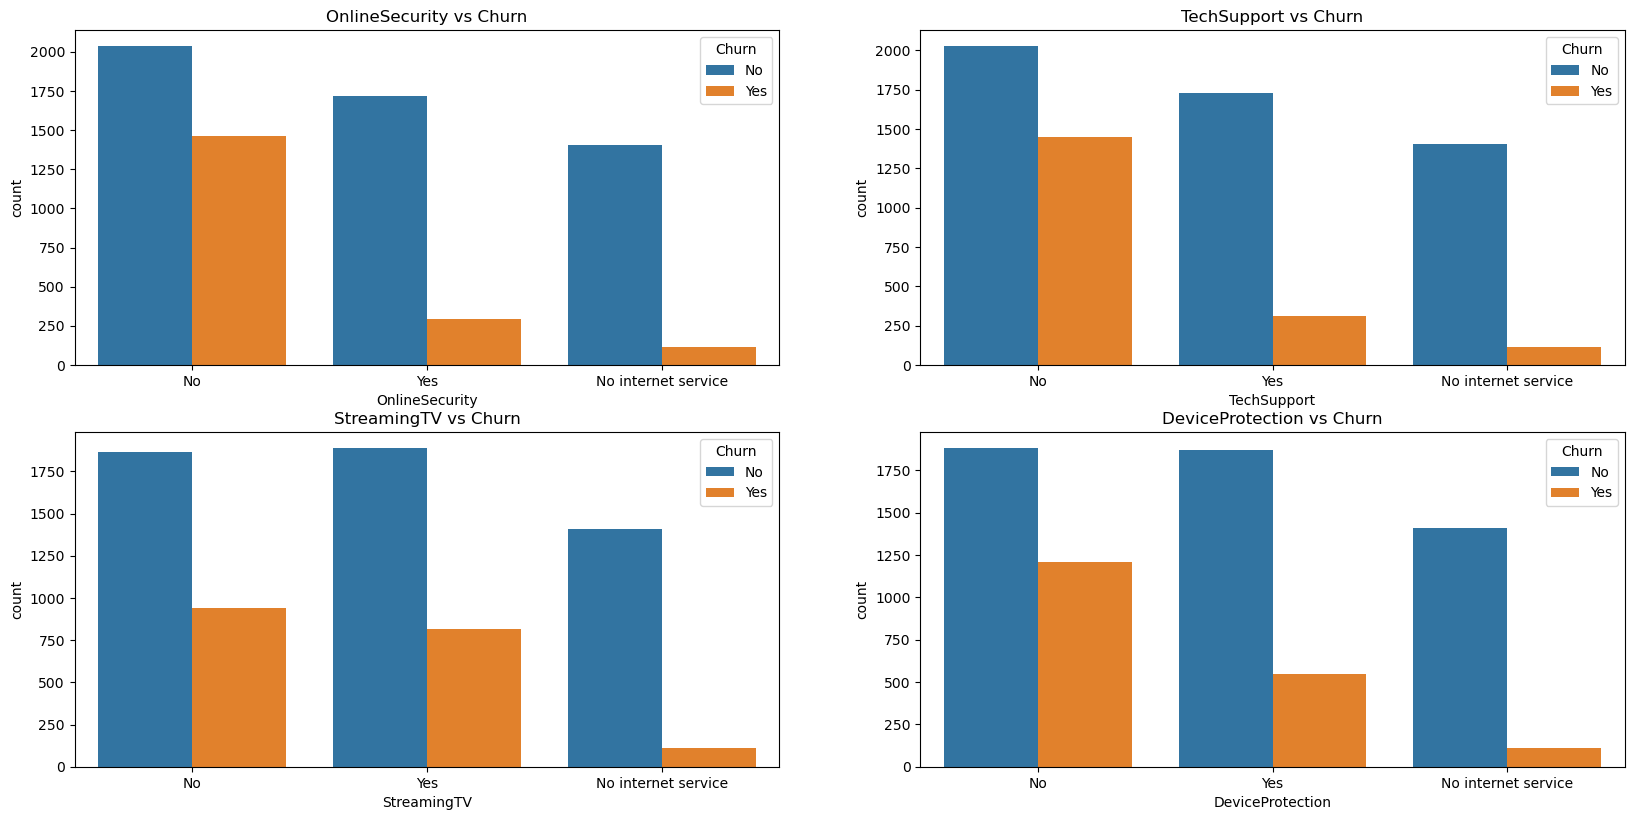

In [54]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
plot_count('OnlineSecurity','Churn',df)
plt.subplot(4,2,2)
plot_count('TechSupport','Churn',df)
plt.subplot(4,2,3)
plot_count('StreamingTV','Churn',df)
plt.subplot(4,2,4)
plot_count('DeviceProtection','Churn',df)

### 4. Make Pipeline
- Feature engineering
- Preprocessing
    - One Hot Encoder for Categorical Columns
    - log Transformation
    - columns selection
- Simple Imputer (Median)
- Random Forest Classifier - Logistic Regression - XGBoost

In [55]:
map_labels = {"No": 0,
              "Yes": 1}

X = df_orignal.drop(columns = ['Churn'])
y = df_orignal['Churn'].map(map_labels)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [57]:
print(X_train.shape)
print(X_test.shape)

(5634, 20)
(1409, 20)


In [58]:
def preprocessing_data(data):
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').astype(float)
    df["TotalCharges"] = df["TotalCharges"].apply(lambda x: np.log1p(x))
    data = data.drop(columns= ['customerID'])
    return data

In [59]:
num_attribs = ["MonthlyCharges", "TotalCharges", "tenure"]
cat_attribs = ["SeniorCitizen", "gender", "Partner", "Dependents",
               "PhoneService", "MultipleLines", "InternetService", 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
               'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(drop='first'), cat_attribs),
])

#### Logistic Regression

In [60]:
clf_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=300, class_weight="balanced"))])
clf_lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['SeniorCitizen', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=300))])

In [61]:
X_train_preprocessing = preprocessing_data(X_train)
X_train_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 3738 to 5639
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null   objec

In [62]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf_lr, X_train_preprocessing, y_train, cv=skf, n_jobs=-1)
scores.mean()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0.7497357746620813

In [63]:
clf_lr.fit(X_train_preprocessing, y_train)
score = clf_lr.score(X_train_preprocessing, y_train)
print(f"Accuracy Train: {score:.3f}")

X_test_preprocessed = preprocessing_data(X_test)
score = clf_lr.score(X_test_preprocessed, y_test)
print(f"Accuracy Test: {score:.3f}")

Accuracy Train: 0.753
Accuracy Test: 0.739


#### Random Forest and tuning hyperParameter 

In [64]:
rf = RandomForestClassifier(n_estimators=50, max_depth=7, min_samples_leaf= 1, min_samples_split=5, random_state=42)
clf_RF = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rf )])
clf_RF

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['SeniorCitizen', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=7, min_samples_split=5,
                                        n_estimators=50, random_state=42))])

In [65]:
clf_RF.fit(X_train_preprocessing, y_train)
score = clf_RF.score(X_train_preprocessing, y_train)
print(f"Accuracy Train: {score:.3f}")

X_test_preprocessed = preprocessing_data(X_test)
score = clf_RF.score(X_test_preprocessed, y_test)
print(f"Accuracy Test: {score:.3f}")

Accuracy Train: 0.815
Accuracy Test: 0.803


```python
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
params = {
    'classifier__n_estimators': [50, 75,100, 150, 200],
    'classifier__max_depth': [None, 5, 7,10, 15, 20],
    'classifier__min_samples_split': [2, 3, 5, 7],
    'classifier__min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(clf_RF, param_grid=params, cv=skf,verbose=1, scoring= make_scorer(f1_score))
X_train_preprocessed = preprocessing_data(X_train)

grid_search.fit(X_train_preprocessed, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.3f}")
```

```
Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best F1_score: 0.583
```

In [66]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf= 2, min_samples_split=2, random_state=42)
clf_RF = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rf )])
clf_RF

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['SeniorCitizen', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                        n_estimators=200, random_state=42))])

In [67]:
X_train_preprocessed = preprocessing_data(X_train)
clf_RF.fit(X_train_preprocessed, y_train)
score = clf_RF.score(X_train_preprocessed, y_train)
print(f"Accuracy Train: {score:.3f}")

X_test_preprocessed = preprocessing_data(X_test)
score = clf_RF.score(X_test_preprocessed, y_test)
print(f"Accuracy Test: {score:.3f}")

Accuracy Train: 0.855
Accuracy Test: 0.806


In [68]:
y_pred = clf_RF.predict(X_test_preprocessed)
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [69]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[939  96]
 [178 196]]


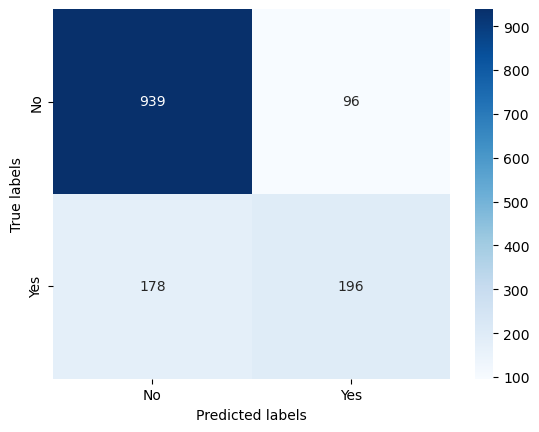

In [70]:
labels = ['No', 'Yes']
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#### XGBoost & Tuning HyperParameter

In [71]:
xgb = XGBClassifier(n_estimators=250, max_depth=10)
clf_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', xgb )])
clf_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['SeniorCitizen', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'Online...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=250,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

```python
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
params = {
    'classifier__n_estimators': [50, 75,100, 150, 200, 250, 300],
    'classifier__max_depth': [None, 5, 7,10, 15, 20],
    'classifier__learning_rate': [0.001,0.005,0.01,0.02]
}
grid_search = GridSearchCV(clf_xgb, param_grid=params, cv=skf,verbose=1, scoring= make_scorer(f1_score))
X_train_preprocessed = preprocessing_data(X_train)

grid_search.fit(X_train_preprocessed, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.3f}")
```
```
Fitting 10 folds for each of 168 candidates, totalling 1680 fits
Best parameters: {'classifier__learning_rate': 0.02, 'classifier__max_depth': None, 'classifier__n_estimators': 200}
Best score: 0.587
```

In [72]:
X_train_preprocessed = preprocessing_data(X_train)
xgb = XGBClassifier( n_estimators=200, max_depth=None, learning_rate= 0.02)
clf_xgb_tuned = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', xgb )])

clf_xgb_tuned.fit(X_train_preprocessed, y_train)
score = clf_xgb_tuned.score(X_train_preprocessed, y_train)
print(f"Accuracy Train: {score:.3f}")

X_test_preprocessed = preprocessing_data(X_test)
score = clf_xgb_tuned.score(X_test_preprocessed, y_test)
print(f"Accuracy Test: {score:.3f}")

Accuracy Train: 0.836
Accuracy Test: 0.803


In [73]:
y_pred = clf_xgb_tuned.predict(X_test_preprocessed)
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [74]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[932 103]
 [175 199]]


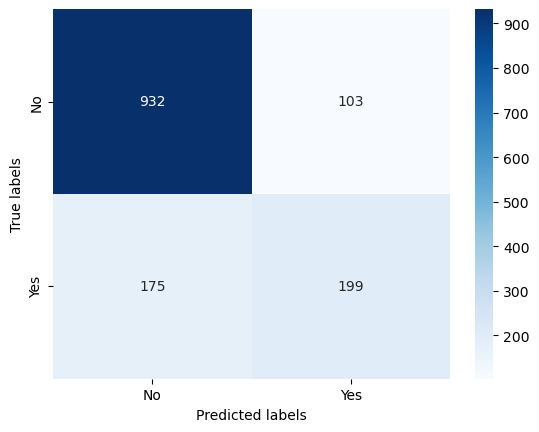

In [75]:
labels = ['No', 'Yes']
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()